In [ ]:
# system
import glob
import time
import os
import logging
import sys

# scipy
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# grandlib
import grand.dataio.root_trees as rt

import database.tools as tools


%matplotlib inline
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

Welcome to JupyROOT 6.26/10


In [2]:
plot_dir = '/pbs/home/p/pcorrea/grand/nutrig/plots'
savefig  = False

In [3]:
#bkg_pulse_file     = '/sps/grand/pcorrea/nutrig/database/bkg/gp13_pretrigger_pulses_th1_35_th2_25/GP13_20240314_153603_RUN125_MD_RAW_10s_ChanXYZ_20dB_11DUs_test_370_dat_trig_filt.npz'
bkg_pulse_file     = '/sps/grand/pcorrea/nutrig/database/bkg/bkg_dataset_nutrig_gp13_test_seed_300.npz'
f                  = np.load(bkg_pulse_file)
bkg_traces         = f['traces']
bkg_pretrig_times  = f['pretrig_times']
bkg_pretrig_flags  = f['pretrig_flags']
bkg_rms            = tools.rms(f['traces'],axis=2)
bkg_max_traces     = np.max(np.abs(f['traces']),axis=2)/bkg_rms

In [ ]:
bins = np.arange(0,10,.25)
plt.hist(bkg_rms[:,0],bins=bins,label='X',histtype='step',linewidth=3)
plt.hist(bkg_rms[:,1],bins=bins,label='Y',histtype='step',linewidth=3)
plt.hist(bkg_rms[:,2],bins=bins,label='Z',histtype='step',linewidth=3)
plt.xlabel('Maximum trace / RMS')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Background')
plt.text(2.8,1.1,'GRAND preliminary', color='crimson')
plt.xlim([2,7])
plt.ylim([.7,4e3])
plt.legend()

if savefig:
    plot_name = 'background_snr'
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

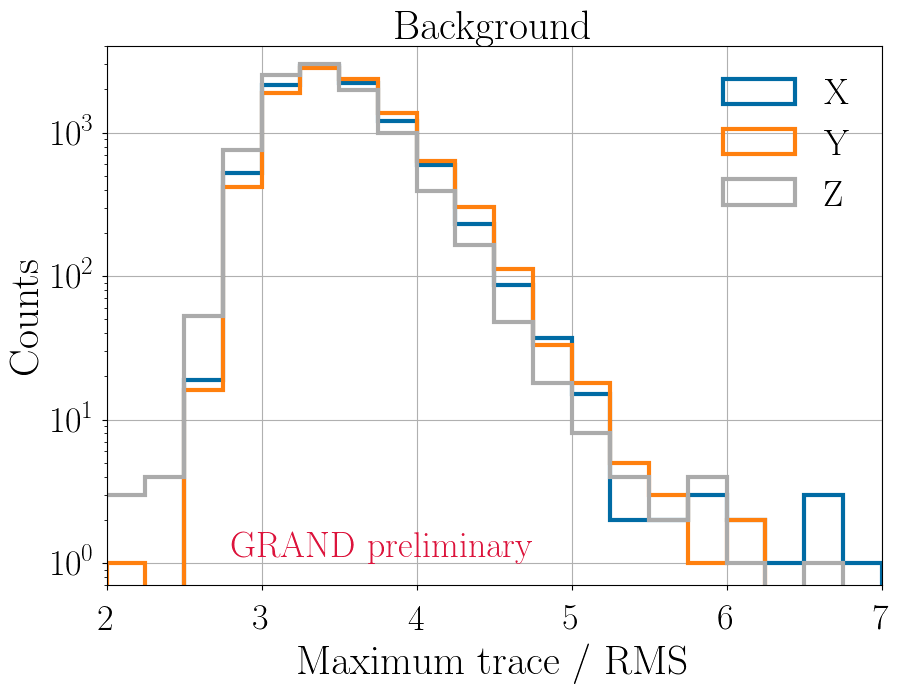

In [5]:
bins = np.arange(0,10,.25)
plt.hist(bkg_max_traces[:,0],bins=bins,label='X',histtype='step',linewidth=3)
plt.hist(bkg_max_traces[:,1],bins=bins,label='Y',histtype='step',linewidth=3)
plt.hist(bkg_max_traces[:,2],bins=bins,label='Z',histtype='step',linewidth=3)
plt.xlabel('Maximum trace / RMS')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Background')
plt.text(2.8,1.1,'GRAND preliminary', color='crimson')
plt.xlim([2,7])
plt.ylim([.7,4e3])
plt.legend()

if savefig:
    plot_name = 'background_snr'
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

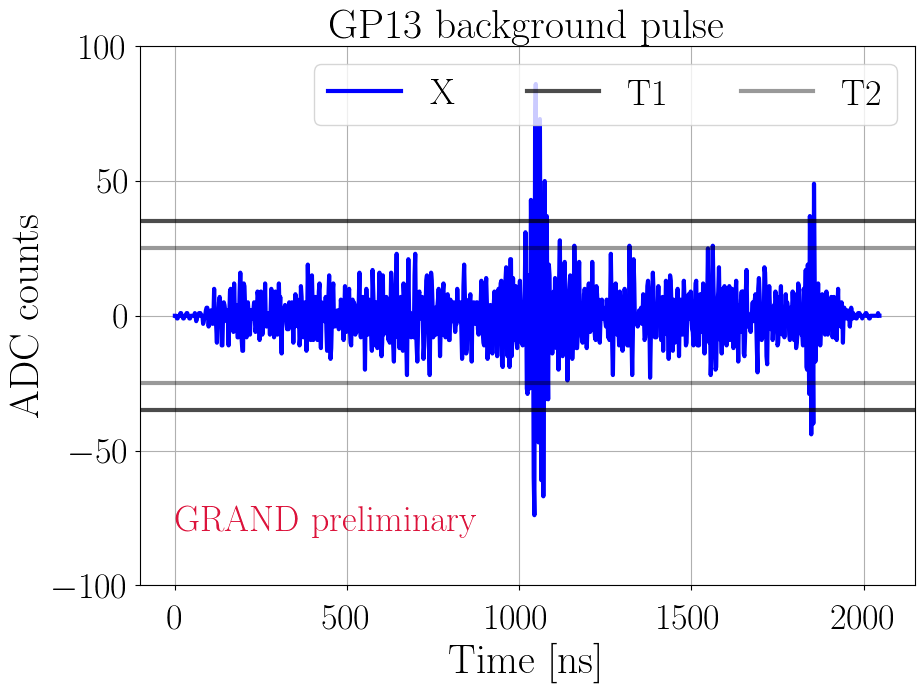

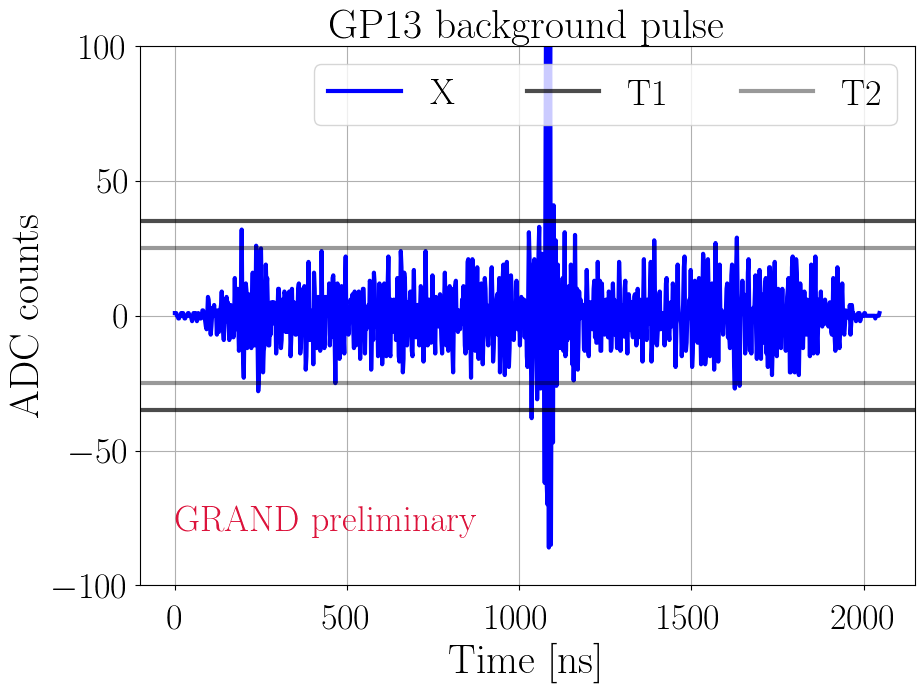

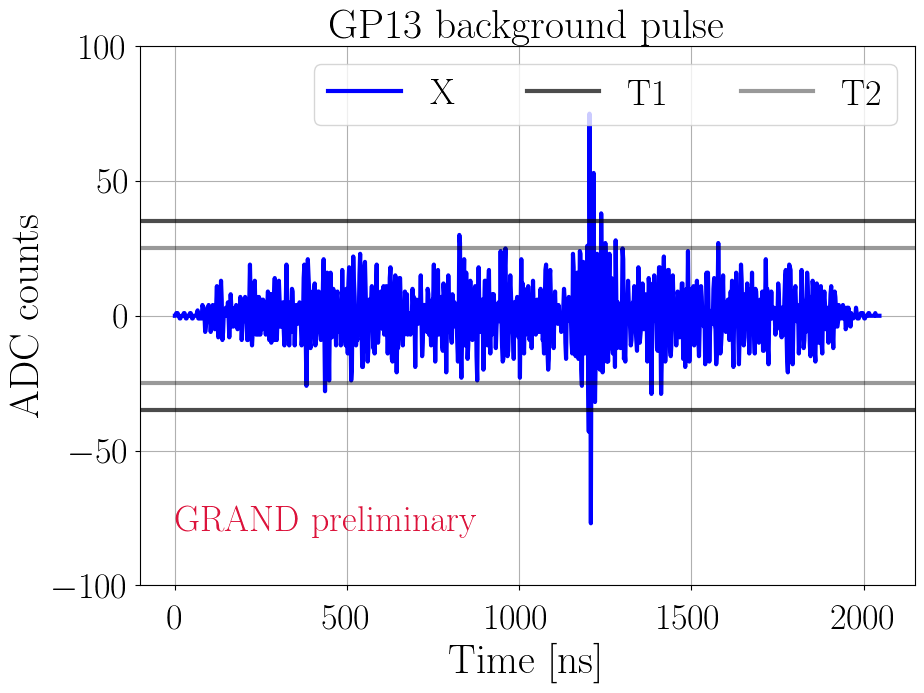

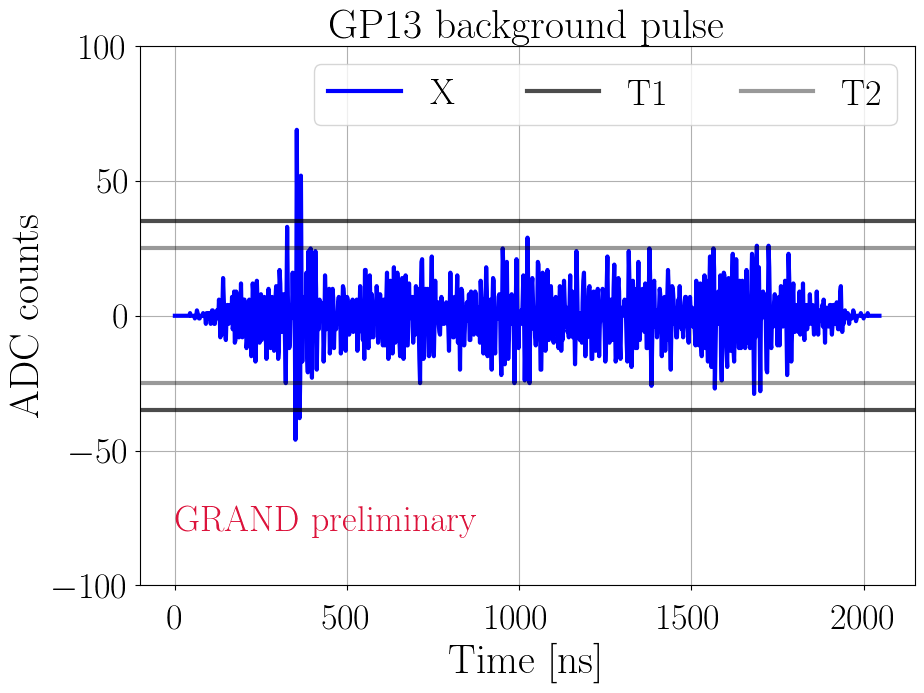

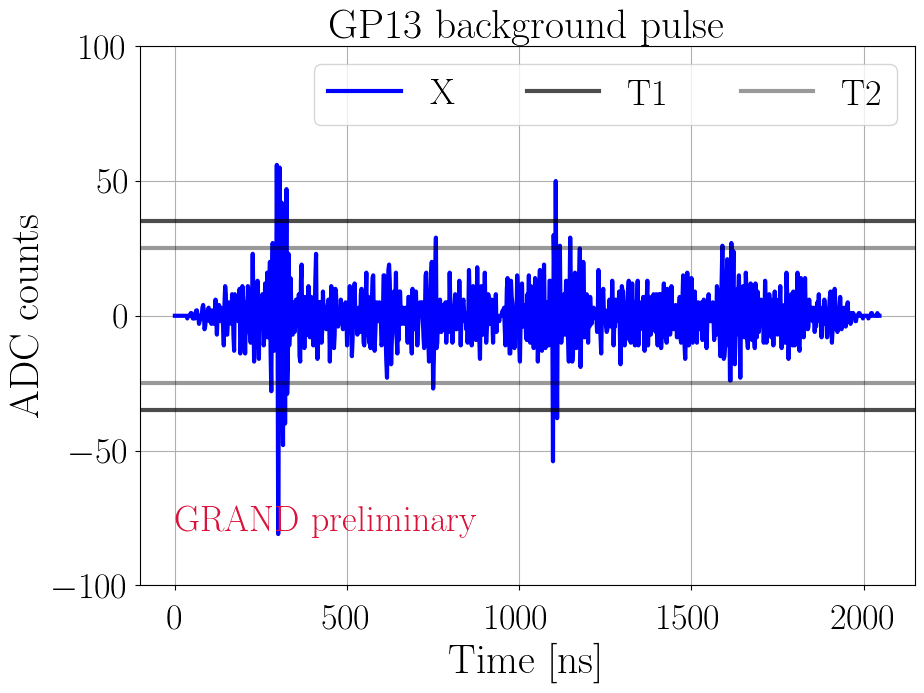

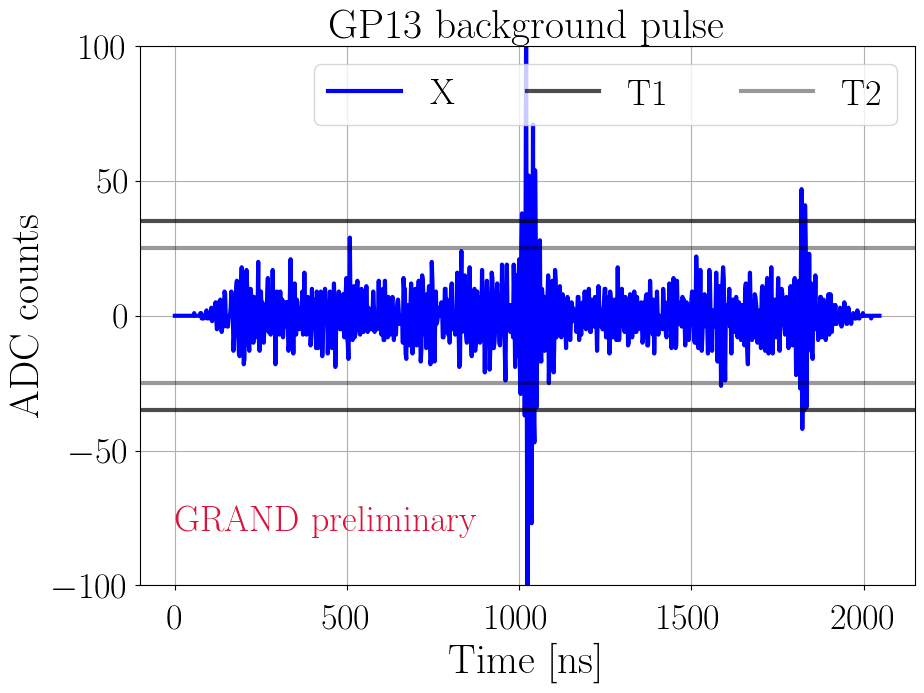

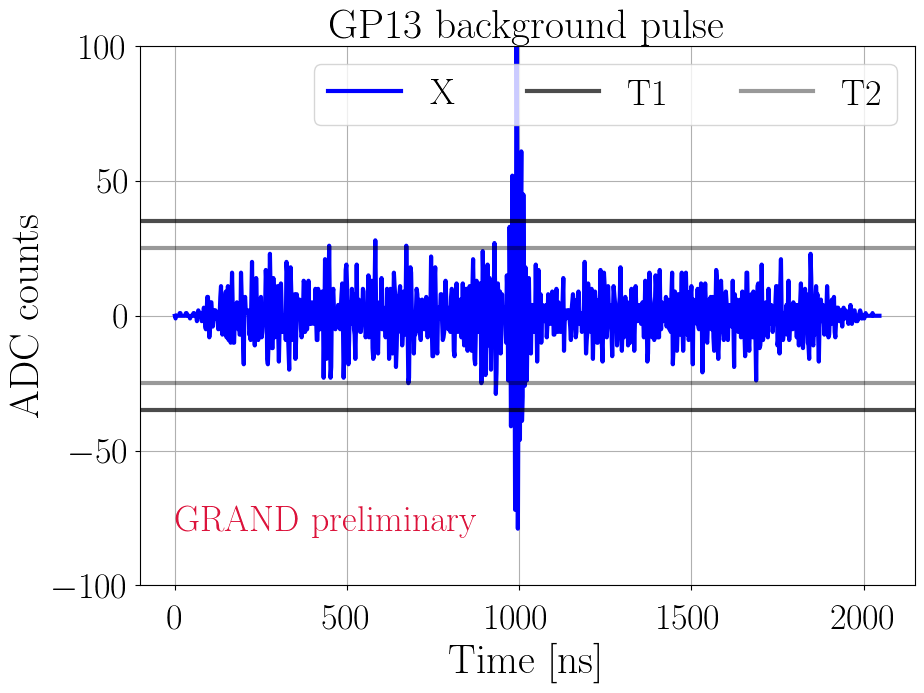

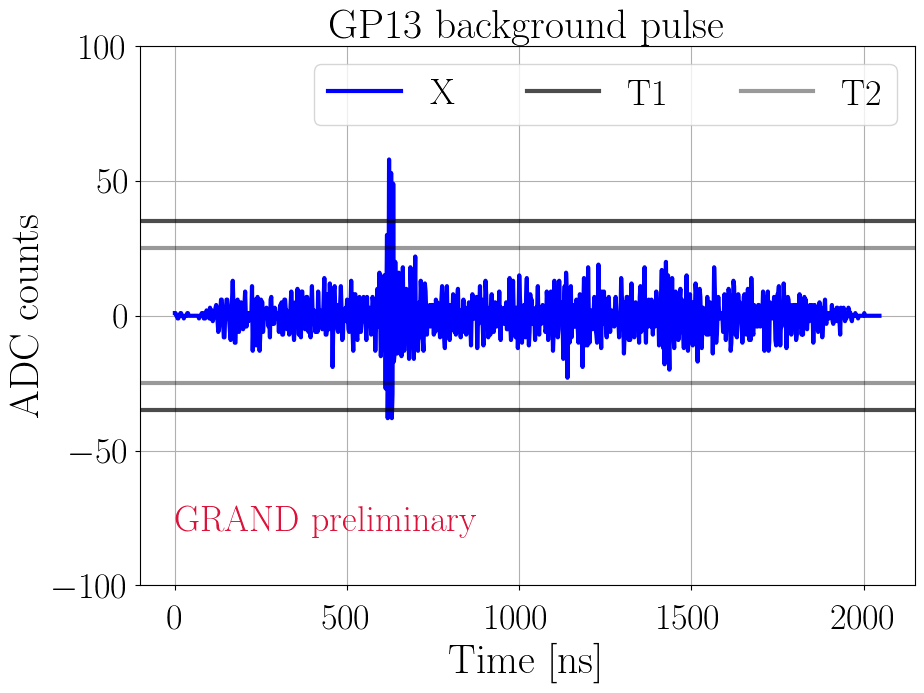

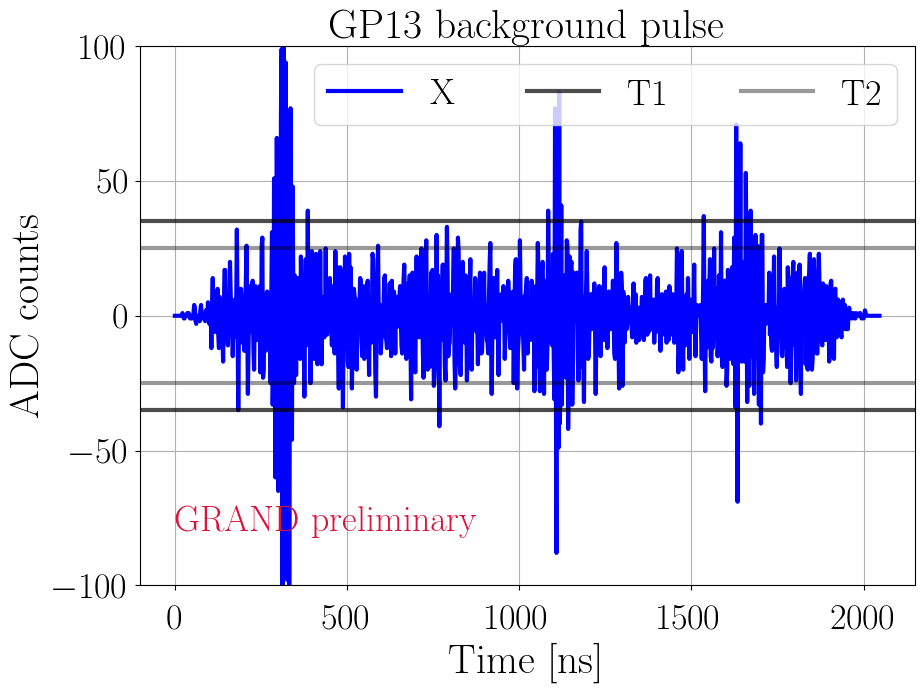

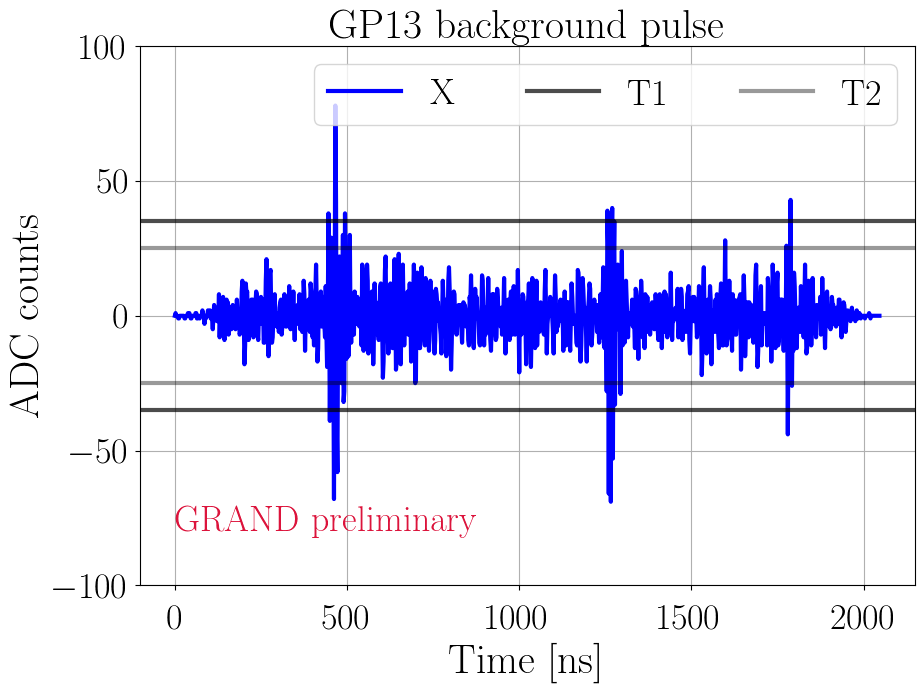

In [6]:
# NOTE: need 'testing' sample here to reproduce ARENA plot

max_trace = 6.2
j = 0

x = np.arange(1024)*2

for i in range( len(bkg_traces) ):
    if bkg_max_traces[i][0] > max_trace: #and bkg_max_traces[i][1] > max_trace
        plt.plot(x,bkg_traces[i,0],color='b',label='X')

        plt.axhline(35,color='k',alpha=.7,label='T1')
        plt.axhline(25,color='k',alpha=.4,label='T2')
        plt.axhline(-35,color='k',alpha=.7)
        plt.axhline(-25,color='k',alpha=.4)

        plt.ylim([-100,100])

        plt.xlabel('Time [ns]')
        plt.ylabel('ADC counts')
        plt.text(0,-80,'GRAND preliminary', color='crimson')

        plt.title('GP13 background pulse')

        plt.legend(frameon=True,framealpha=.8,loc='upper right',ncol=3)
        
        j+=1

        if j==7 and savefig:
            plot_name = 'background_pulse_GP13' #+ param_str
            
            plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
            plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

        plt.show()

        if j == 10:
            break

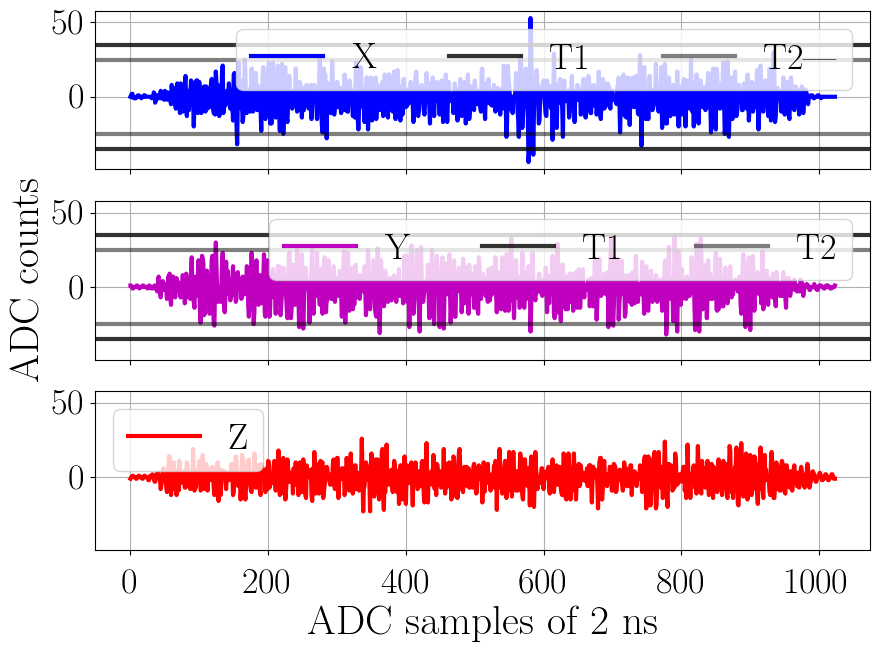

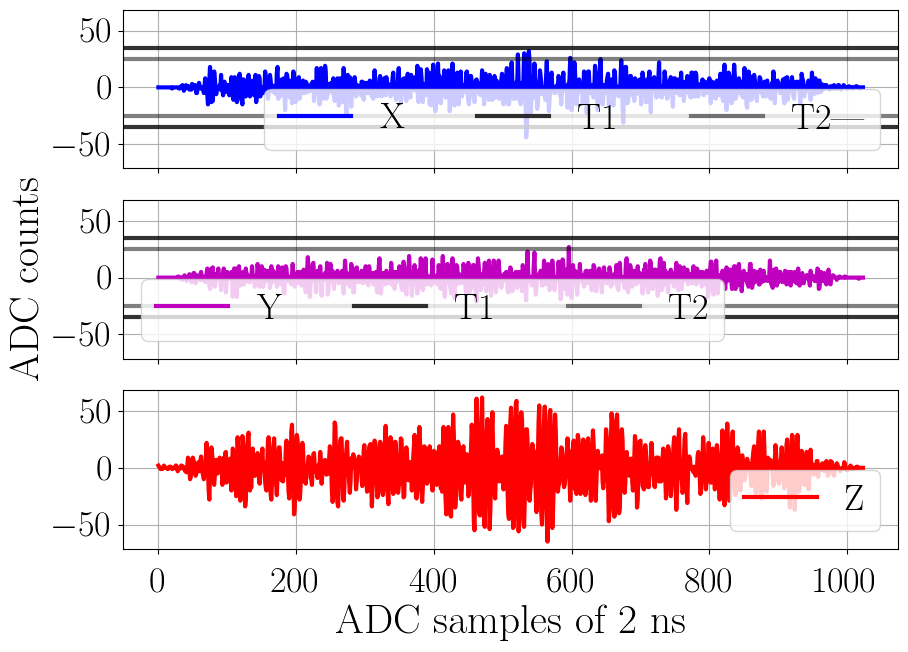

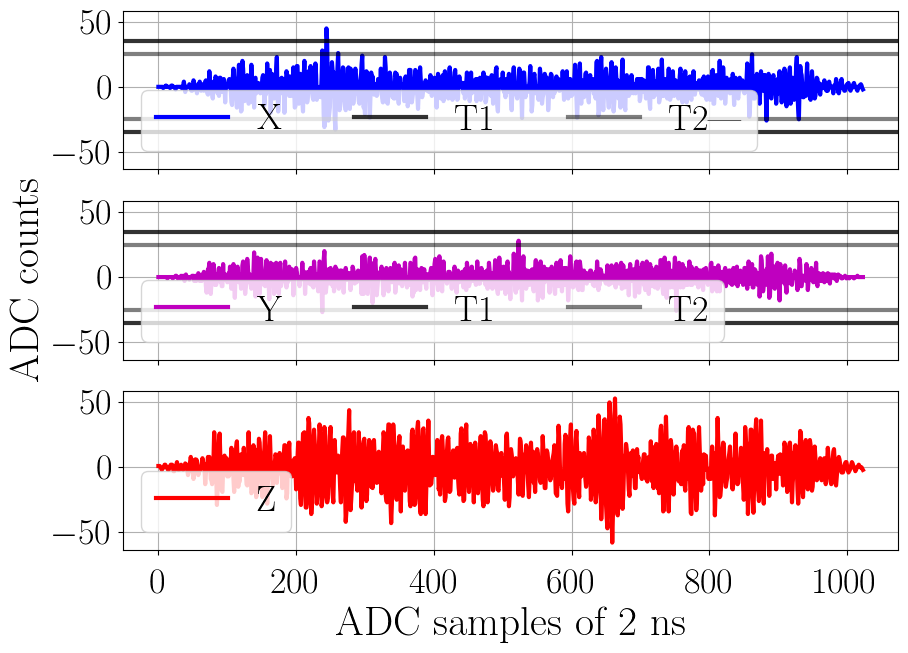

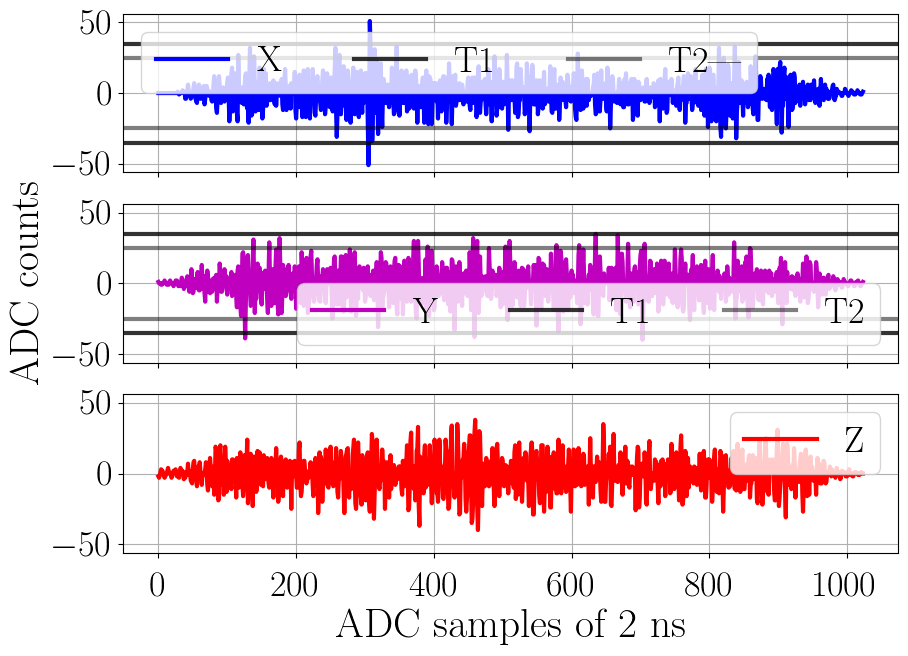

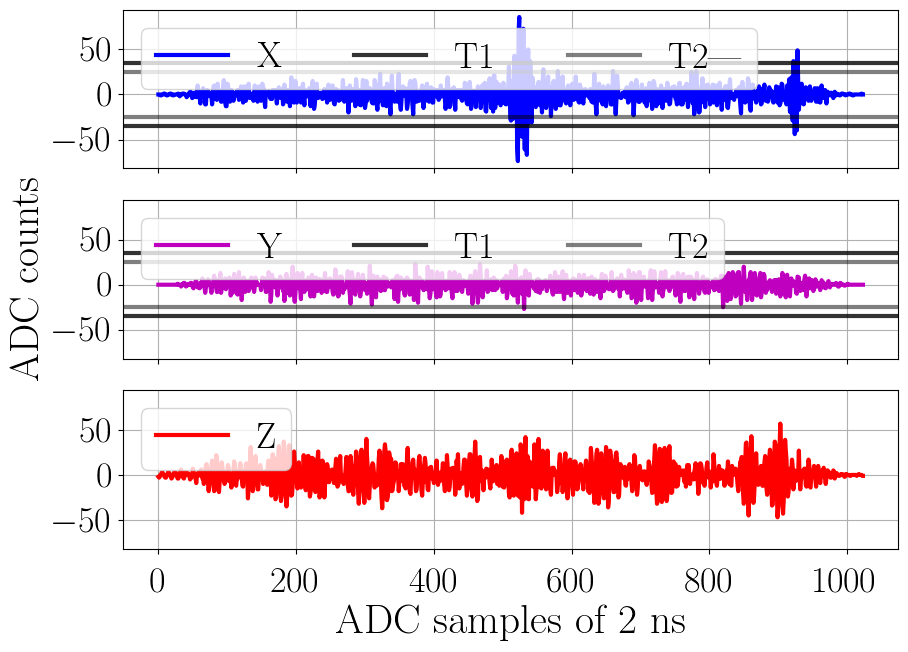

In [13]:
j = 0
for i in range( len(bkg_traces) ):
    if j == 5:
        break
    if bkg_max_traces[i,0] > 5:
        fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

        ax[0].plot(bkg_traces[i,0],color='b',label='X')
        ax[1].plot(bkg_traces[i,1],color='m',label='Y')
        ax[2].plot(bkg_traces[i,2],color='r',label='Z')

        ax[0].axhline(35,color='k',alpha=.8,label='T1')
        ax[0].axhline(25,color='k',alpha=.5,label='T2|')
        ax[0].axhline(-35,color='k',alpha=.8)
        ax[0].axhline(-25,color='k',alpha=.5)

        ax[1].axhline(35,color='k',alpha=.8,label='T1')
        ax[1].axhline(25,color='k',alpha=.5,label='T2')
        ax[1].axhline(-35,color='k',alpha=.8)
        ax[1].axhline(-25,color='k',alpha=.5)

        ax[2].set_xlabel('ADC samples of 2 ns')
        ax[1].set_ylabel('ADC counts')

        ax[0].legend(frameon=True,framealpha=.8,ncol=3)
        ax[1].legend(frameon=True,framealpha=.8,ncol=3)
        ax[2].legend(frameon=True,framealpha=.8,ncol=3)

        plt.show()

        j+=1

## Signal pulses

In [3]:
sig_pulse_file      = '/sps/grand/pcorrea/nutrig/database/sig/sig_dataset_nutrig_gp13_train_seed_300.npz'
f                   = np.load(sig_pulse_file)
sig_traces          = f['traces']
sig_pretrig_times   = f['pretrig_times']
sig_pretrig_flags   = f['pretrig_flags']
sig_rms             = tools.rms(f['traces'],axis=2)
sig_max_traces      = np.max(np.abs(f['traces']),axis=2)/sig_rms
sig_inj_pulse_times = f['inj_pulse_times']
sig_snr             = f['snr']

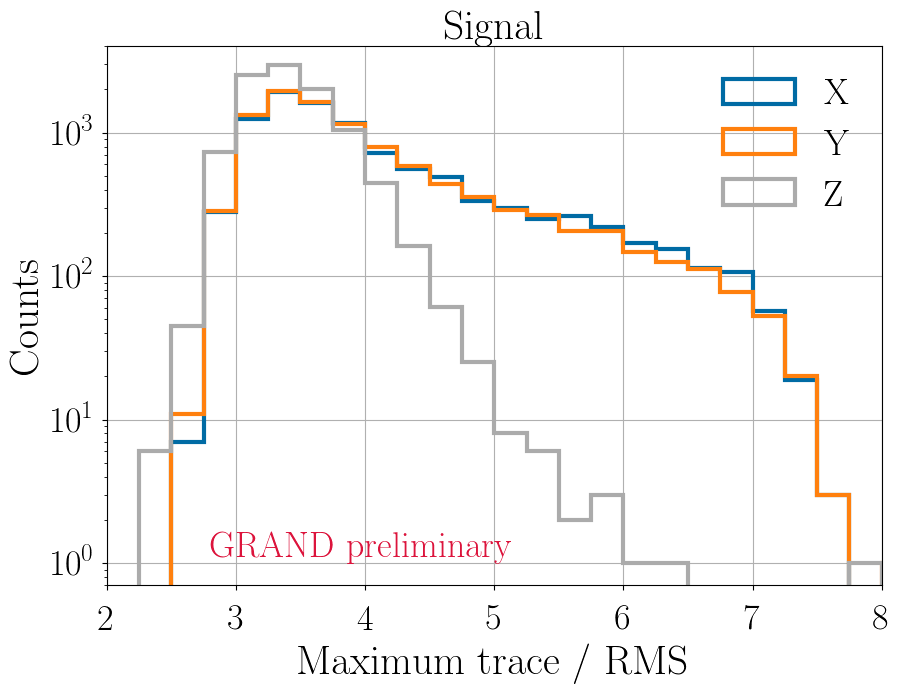

In [4]:
bins = np.arange(0,10,.25)
plt.hist(sig_max_traces[:,0],bins=bins,label='X',histtype='step',linewidth=3)
plt.hist(sig_max_traces[:,1],bins=bins,label='Y',histtype='step',linewidth=3)
plt.hist(sig_max_traces[:,2],bins=bins,label='Z',histtype='step',linewidth=3)
plt.xlabel('Maximum trace / RMS')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Signal')
plt.text(2.8,1.1,'GRAND preliminary', color='crimson')
plt.xlim([2,8])
plt.ylim([.7,4e3])
plt.legend()

if savefig:
    plot_name = 'signal_snr'
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

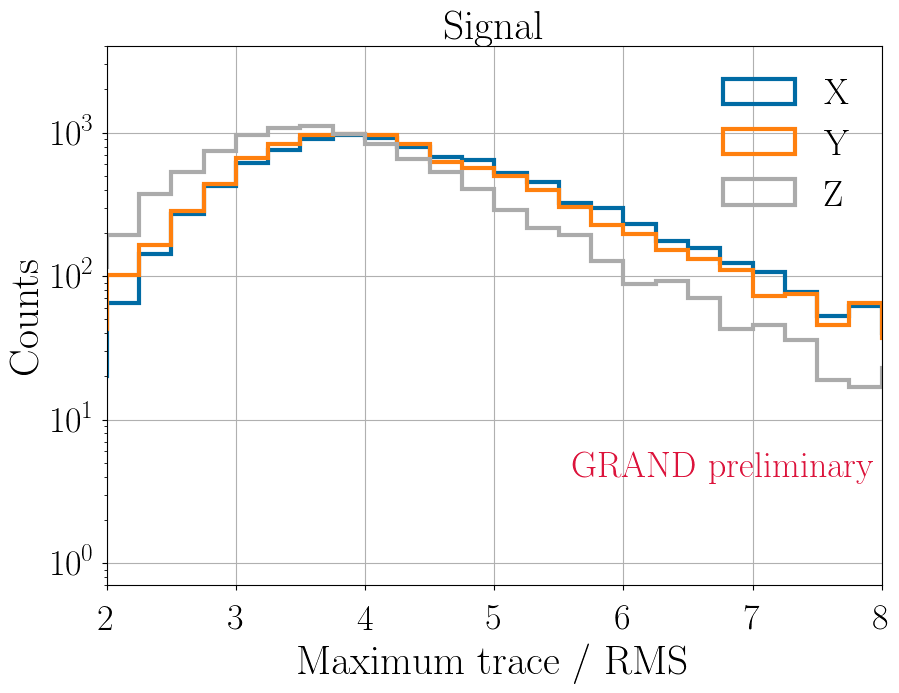

In [32]:
bins = np.arange(0,10,.25)
plt.hist(sig_max_traces[:,0],bins=bins,label='X',histtype='step',linewidth=3)
plt.hist(sig_max_traces[:,1],bins=bins,label='Y',histtype='step',linewidth=3)
plt.hist(sig_max_traces[:,2],bins=bins,label='Z',histtype='step',linewidth=3)
plt.xlabel('Maximum trace / RMS')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Signal')
plt.text(5.6,4e0,'GRAND preliminary', color='crimson')
plt.xlim([2,8])
plt.ylim([.7,4e3])
plt.legend()
plt.show()

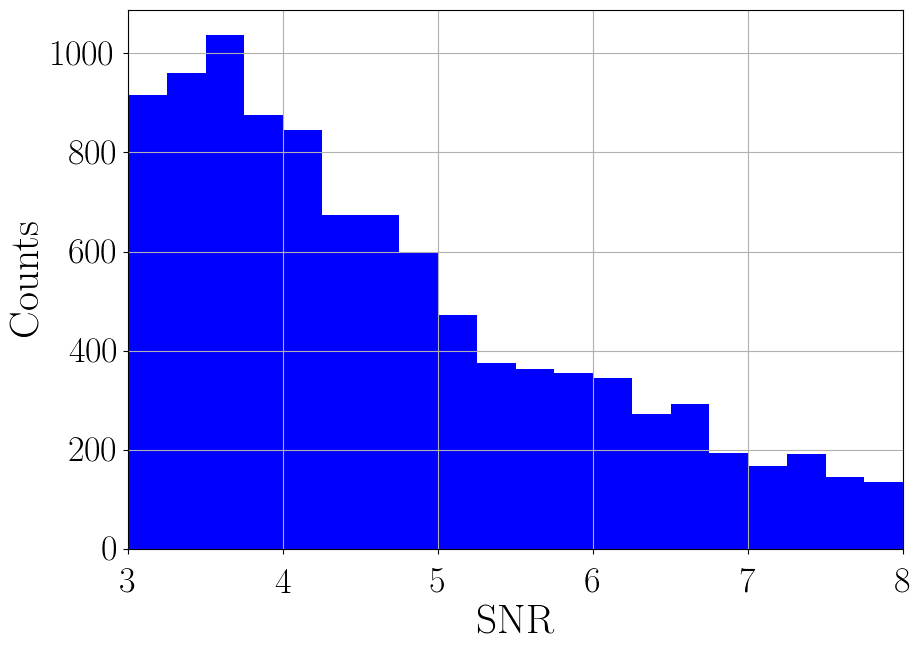

In [37]:
bins = np.arange(0,10,.25)
plt.hist(sig_snr,bins=bins,color='b')
plt.xlim([3,8])
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.show()

Text(0.5, 0, '')

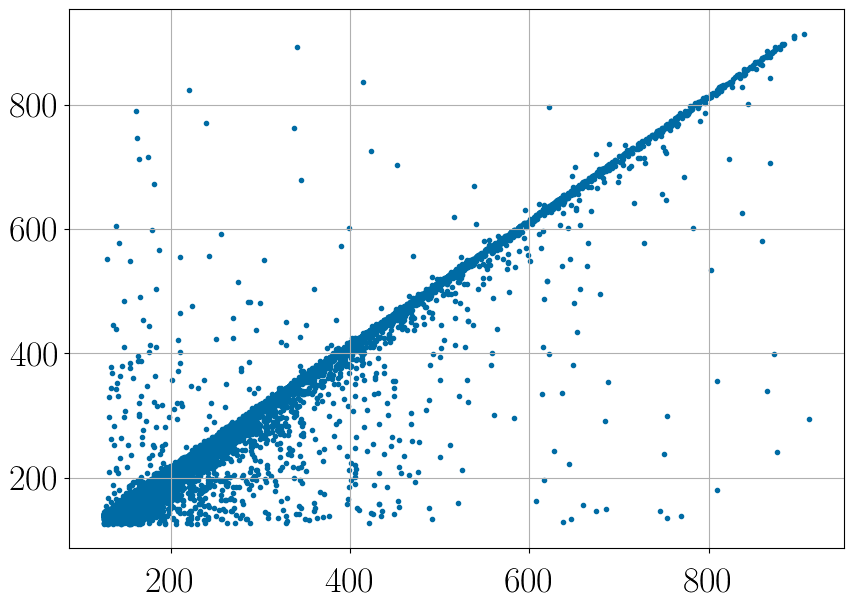

In [38]:
plt.scatter(sig_inj_pulse_times,sig_pretrig_times)
plt.xlabel('')

### Look at shower parameters of selection

In [5]:
omega   = np.zeros(sig_pretrig_times.shape)
omega_c = np.zeros(sig_pretrig_times.shape)
zenith  = np.zeros(sig_pretrig_times.shape)
azimuth = np.zeros(sig_pretrig_times.shape)
energy  = np.zeros(sig_pretrig_times.shape)

with np.load(sig_pulse_file) as f:
    sig_event_files = f['files'] # air-shower simulation files from which the traces were selected
    entries         = f['entries'] # entries in the files that correspond to the DU of which the trace was selected

idcs = np.arange(len(entries))
for file, entry, i in zip(sig_event_files[:],entries[:],idcs[:]):
    print(f'Loading info of file {i+1}/{len(entries)}')
    with np.load(file) as f:
        omega[i]    = f['omega'][entry]
        omega_c[i]  = f['omega_c']
        zenith[i]   = f['zenith']
        azimuth[i]  = f['azimuth']
        energy[i] = f['energy']

Loading info of file 1/10000
Loading info of file 2/10000
Loading info of file 3/10000
Loading info of file 4/10000
Loading info of file 5/10000
Loading info of file 6/10000
Loading info of file 7/10000
Loading info of file 8/10000
Loading info of file 9/10000
Loading info of file 10/10000
Loading info of file 11/10000
Loading info of file 12/10000
Loading info of file 13/10000
Loading info of file 14/10000
Loading info of file 15/10000
Loading info of file 16/10000
Loading info of file 17/10000
Loading info of file 18/10000
Loading info of file 19/10000
Loading info of file 20/10000
Loading info of file 21/10000
Loading info of file 22/10000
Loading info of file 23/10000
Loading info of file 24/10000
Loading info of file 25/10000
Loading info of file 26/10000
Loading info of file 27/10000
Loading info of file 28/10000
Loading info of file 29/10000
Loading info of file 30/10000
Loading info of file 31/10000
Loading info of file 32/10000
Loading info of file 33/10000
Loading info of fil

/scratch/users/p/pcorrea/ipykernel_7054/2173005260.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  hist = plt.hist2d(zenith,omega_diff,bins=(zenith_bins,omega_bins),cmap='Blues',norm=matplotlib.colors.LogNorm())


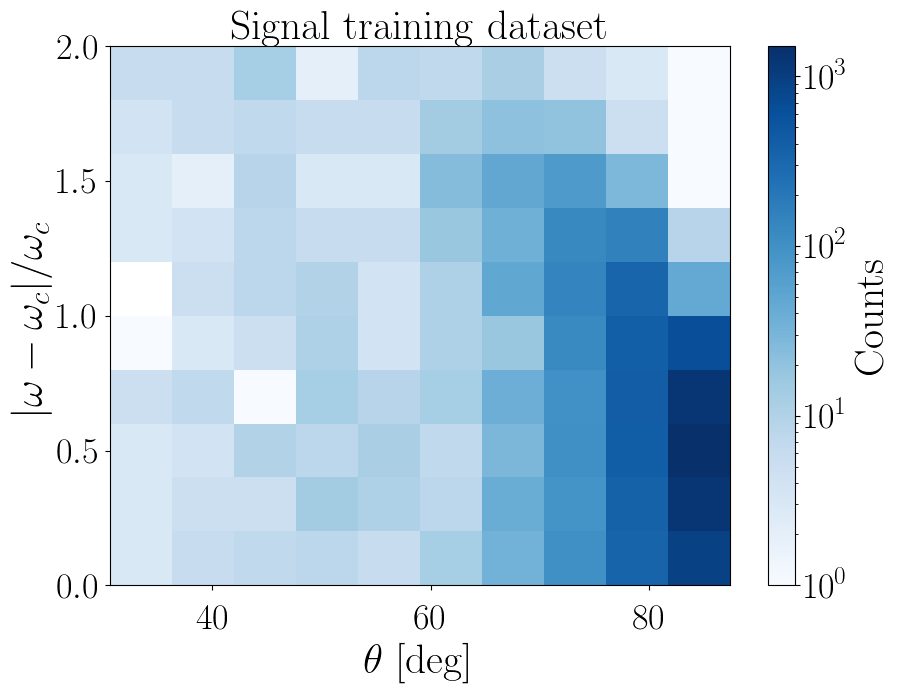

In [12]:
omega_diff = np.abs(omega-omega_c)/omega_c

zenith_bins = np.linspace(30.6,87.35,11)
omega_bins  = np.linspace(0,2,11)

hist = plt.hist2d(zenith,omega_diff,bins=(zenith_bins,omega_bins),cmap='Blues',norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(hist[3],label='Counts')

plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$|\omega-\omega_c|/\omega_c$')

plt.title('Signal training dataset')

plt.show()

In [7]:
sim_with_noise_file   = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_35_th2_25/sim_plus_noise_GP300_Xi_Sib_Proton_1.06_77.4_241.8_7842_seed_8904.npz'
f                     = np.load(sim_with_noise_file)
sim_with_noise_traces = f['traces']

In [8]:
idx        = 20
test_trace = sim_with_noise_traces[idx]

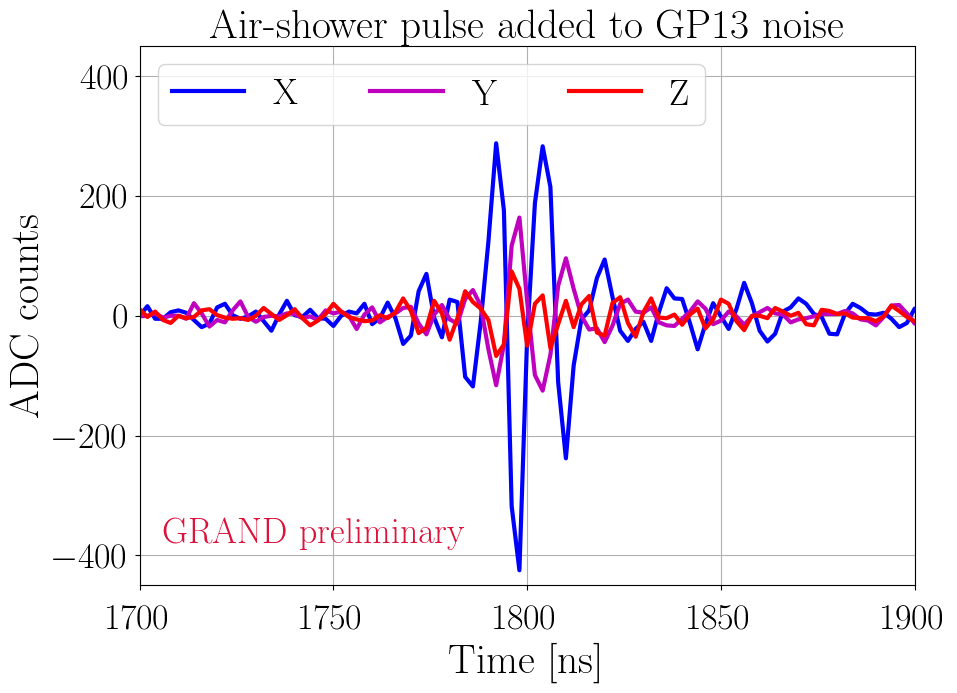

In [16]:
x = np.arange(1024)*2

plt.plot(x,test_trace[0],color='b',label='X')
plt.plot(x,test_trace[1],color='m',label='Y')
plt.plot(x,test_trace[2],color='r',label='Z')

plt.xlim(850*2,950*2)
plt.ylim(-450,450)

plt.xlabel('Time [ns]')
plt.ylabel('ADC counts')
plt.title('Air-shower pulse added to GP13 noise')

plt.text(853*2,-380,'GRAND preliminary', color='crimson')
#plt.text(30,-380,'GRAND preliminary', color='crimson')

plt.legend(ncol=3,frameon=True,framealpha=.8,loc='upper left')

if savefig:
    plot_name = f'signal_pulse_added_to_noise_zoom' #+ param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

In [38]:
sim_dir   = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35'
sim_files = glob.glob( os.path.join(sim_dir,'*.npz') )

energy  = np.zeros( len(sim_files) )
zenith  = np.zeros( len(sim_files) )
azimuth = np.zeros( len(sim_files) )

for i, file in enumerate(sim_files):
    filename       = os.path.basename(file)
    filename_split = filename.split('_')

    energy[i]  = float( filename_split[7] )
    zenith[i]  = float( filename_split[8] )
    azimuth[i] = float( filename_split[9] )

In [39]:
f = np.load(file)
for key in f.keys():
    print(key)

traces
snr
inj_pulse_times
pretrig_flags
pretrig_times
du_xyz
du_seconds
du_nanoseconds
noise_file
noise_file_entries


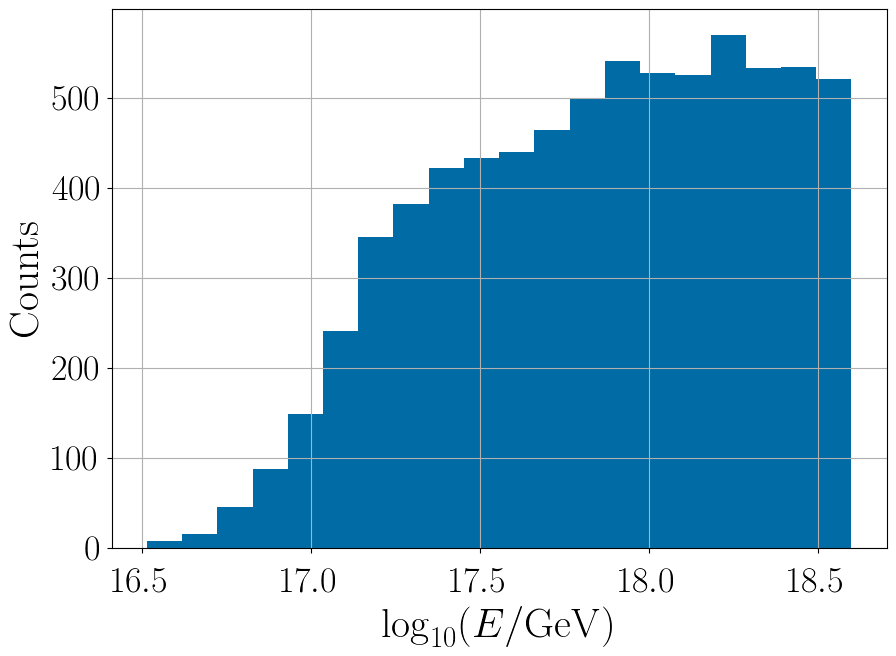

In [23]:
plt.hist(np.log10(energy*1e18),bins=20)
plt.xlabel(r'$\log_{10}(E/{\rm GeV})$')
plt.ylabel('Counts')
plt.show()

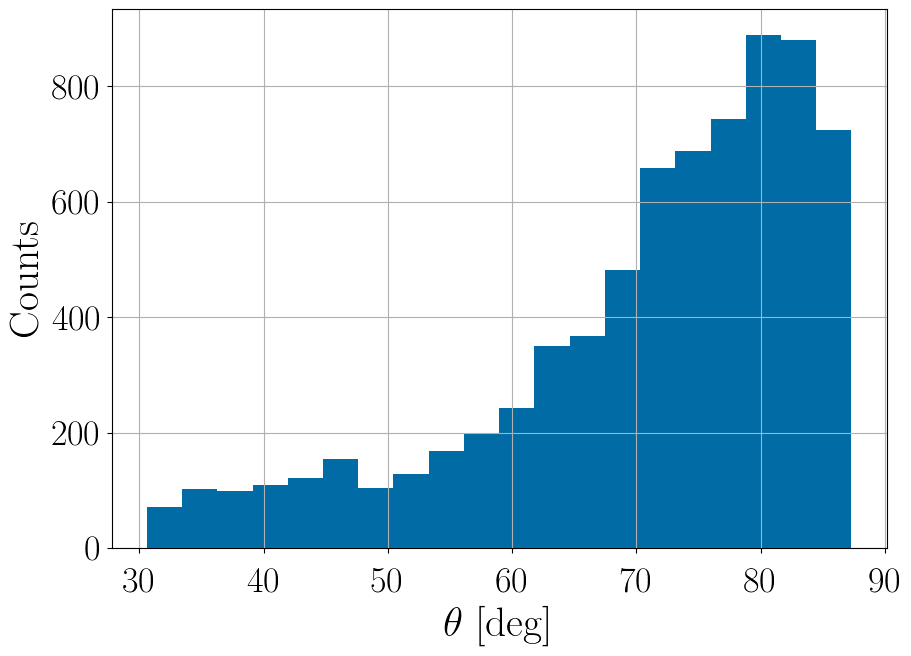

In [24]:
plt.hist(zenith,bins=20)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Counts')
plt.show()

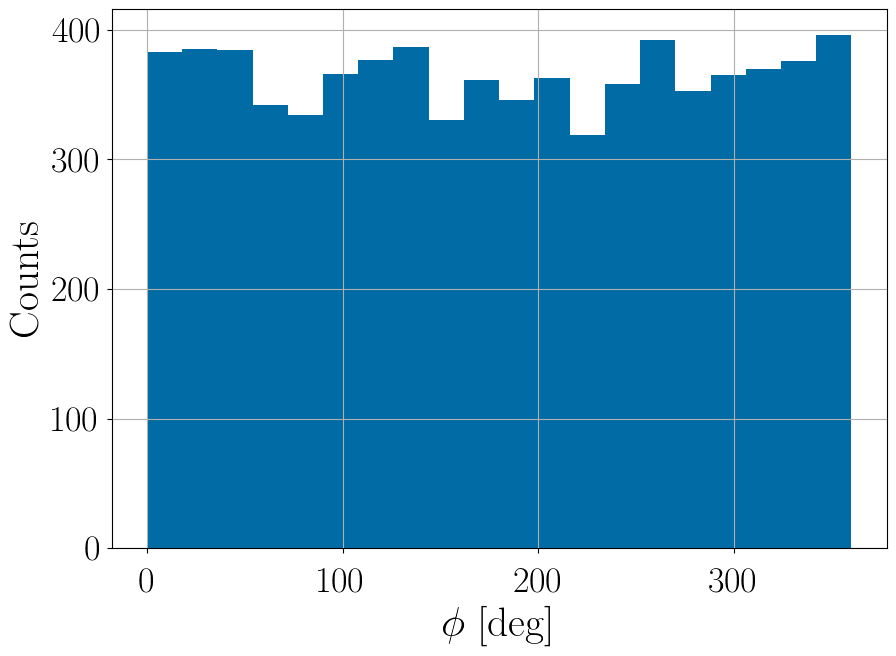

In [25]:
plt.hist(azimuth,bins=20)
plt.xlabel(r'$\phi$ [deg]')
plt.ylabel('Counts')
plt.show()

## Check the number of background pulses / stationary events and calculate total livetime

In [7]:
th1 = 35
th2 = 25

bkg_pulse_dir = f'/sps/grand/pcorrea/nutrig/database/bkg/gp13_pretrigger_pulses_th1_{th1}_th2_{th2}'
bkg_stat_dir  = f'/sps/grand/pcorrea/nutrig/database/bkg/gp13_pretrigger_stationary_th1_{th1}_th2_{th2}'

bkg_pulse_files = sorted( glob.glob( os.path.join(bkg_pulse_dir,'*.npz') ) )
bkg_stat_files  = sorted( glob.glob( os.path.join(bkg_stat_dir,'*.npz') ) )

In [6]:
n_pulses = 0 # 992114
for file in bkg_pulse_files:
    with np.load(file) as f:
        n_pulses += len(f['traces'])

NameError: name 'bkg_stat_files' is not defined

In [9]:
n_stat = 0 # 5703390
for file in bkg_stat_files:
    with np.load(file) as f:
        n_stat += len(f['traces'])

In [12]:
n_tot    = n_pulses + n_stat
livetime = n_tot*2.048e-6

print(livetime,n_pulses/n_tot,n_tot)

13.712392192000001 0.14817614924880934 6695504


In [22]:
trun = rt.TRun('/sps/grand/pcorrea/nutrig/sim/zhaires/efield/gr_GP300_Xi_Sib_Proton_3.4_86.8_227.6_7368.root')
tshower = rt.TShower('/sps/grand/pcorrea/nutrig/sim/zhaires/efield/gr_GP300_Xi_Sib_Proton_3.4_86.8_227.6_7368.root')
trun.get_entry(0), tshower.get_entry(0)
shower_core_pos = np.array(tshower.shower_core_pos)
du_xyz = np.array(trun.du_xyz) + shower_core_pos



gp300_layout_file = '/pbs/home/p/pcorrea/grand/layout/F06970G5G2X_GP300_layout_grandcs_DUonGround.dat'
gp300_xy          = np.loadtxt(gp300_layout_file,skiprows=2,usecols=(0,2,3))

In [23]:
du_xyz

array([[-3.46410181e+03, -6.99999609e+03,  1.28740002e+03],
       [-1.73210181e+03, -6.99999609e+03,  1.26880005e+03],
       [-1.95312500e-03, -6.99999609e+03,  1.25030005e+03],
       [ 1.73209814e+03, -6.99989600e+03,  1.21400000e+03],
       [ 3.46409863e+03, -6.99989600e+03,  1.19300000e+03],
       [-4.33010181e+03, -6.49999609e+03,  1.29440002e+03],
       [-2.59810181e+03, -6.49999609e+03,  1.27840002e+03],
       [-8.66001953e+02, -6.49999609e+03,  1.26169995e+03],
       [ 8.65998047e+02, -6.49999609e+03,  1.23719995e+03],
       [ 2.59809814e+03, -6.49989600e+03,  1.20500000e+03],
       [ 4.32999805e+03, -6.49989600e+03,  1.18730005e+03],
       [-4.33010181e+03, -5.49999609e+03,  1.29540002e+03],
       [-2.59810181e+03, -5.49999609e+03,  1.27259998e+03],
       [-8.66001953e+02, -5.49999609e+03,  1.25980005e+03],
       [ 8.65998047e+02, -5.49999609e+03,  1.23719995e+03],
       [ 2.59809814e+03, -5.49989600e+03,  1.20409998e+03],
       [ 4.33009863e+03, -5.49989600e+03

In [41]:
du_ids = np.zeros(du_xyz.shape[0],dtype=int)

for i, du_pos in enumerate(du_xyz):
    for gp300_pos in gp300_xy:
        if np.linalg.norm( du_pos[:2] - gp300_pos[1:] ) < 0.1:

        #if np.all( np.around(du_pos[:2]) == np.around(gp300_pos[1:]) ):
            du_ids[i] = gp300_pos[0]
            break

In [42]:
du_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [75]:
def get_du_ids(du_xyz_input,
               gp300_layout_file='/pbs/home/p/pcorrea/grand/layout/F06970G5G2X_GP300_layout_grandcs_DUonGround.dat'):
    '''
    Finds the DU IDs for a set of DU coordinates in the GP300 array.

    Arguments
    ---------
    `du_xyz_input`
    type        : np.ndarray[float]
    units       : m
    description : Array of XYZ positions of a set of DUs, with shape (N_du,3). (X,Y)=(0,0) should be at the center of GP300.

    `gp300_layout_file`
    type        : str
    description : Path to .dat file containing the layout information of GP300.
    
                                
    Returns
    -------
    `du_ids`
    type        : np.ndarray[int]
    description : The DU IDs corresponding to the input coordinates.
    '''

    try:
        gp300_layout_info = np.loadtxt(gp300_layout_file,skiprows=2,usecols=(0,2,3))
    except:
        #logger.error('No valid GP300 layout file provided.')
        raise Exception('No valid GP300 layout file provided.')

    # We only care about the X,Y coordinates here
    gp300_du_ids      = gp300_layout_info[:,0]
    gp300_du_xy       = gp300_layout_info[:,1:]
    du_xy_input       = du_xyz_input[:,:2]

    du_ids = np.zeros(du_xyz.shape[0],dtype=int)

    for i, du_pos in enumerate( du_xy_input ):
        for gp300_du_id, gp300_pos in zip(gp300_du_ids,gp300_du_xy):
            if np.linalg.norm( du_pos - gp300_pos ) < 0.1: # to account for numerical errors
                du_ids[i] = gp300_du_id
                break
    
    return du_ids

In [77]:
x = 5
x//2

2

In [2]:
def extract_trigger_parameters(trace, 
                               trigger_config,
                               baseline=0):
    '''
    CREDIT: XISHUI TIAN. See https://github.com/watertien/T1_offline_trigger

    Extracts the relevant parameters to mimic the FLT-0 trigger (=L1 trigger) that is on the GP300 firmware (v1b).

    Arguments
    ---------
    `trace`
    type        : np.ndarray[float]
    units       : ADC counts
    description : ADC trace of one channel, with shape (N_samples,).

    `trigger_config`
    type        : dict
    description : Configuration parameters for the FLT-0.

    `baseline`
    type        : int
    description : Baseline of the trace used to calculate the charge parameter Q.
    
                                
    Returns
    -------
    `dict_trigger_infos`
    type        : dict
    description : Parameters relevant to the FLT-0:
                  - index of first T1 crossing
                  - indices of T2 crossings
                  - number of T2 crossings (NC)
                  - charge Q = peak/NC
    '''

    # Find the position of the first T1 crossing
    index_t1_crossing = np.where(np.abs(trace) > trigger_config["th1"],
                                 np.arange(len(trace)), -1)
    dict_trigger_infos = dict()

    mask_T1_crossing = (index_t1_crossing != -1)
    if sum(mask_T1_crossing) == 0:
        # No T1 crossing 
        raise ValueError("No T1 crossing!")
        
    dict_trigger_infos['index_T1_crossing'] = None
    # Tquiet to decide the quiet time before the T1 crossing 
    for i in index_t1_crossing[mask_T1_crossing]:
       # Abs value not exceeds the T1 threshold
       if i - trigger_config["t_quiet"]//2 < 0:
          raise ValueError("Not enough data before T1 crossing!")
       if np.all(np.abs(trace[np.max([0, i - trigger_config['t_quiet'] // 2]):i]) < trigger_config["th1"]):
          dict_trigger_infos["index_T1_crossing"] = i
          # the first T1 crossing satisfying the quiet condition
          break
    if dict_trigger_infos['index_T1_crossing'] == None:
       raise ValueError("No T1 crossing with Tquiet satified!")
    
    # The trigger logic works for the timewindow given by T_period after T1 crossing.
    # Count number of T2 crossings, relevant pars: T2, NCmin, NCmax, T_sepmax
    # From ns to index, divided by two for 500MHz sampling rate
    period_after_T1_crossing = trace[dict_trigger_infos["index_T1_crossing"]:dict_trigger_infos["index_T1_crossing"]+trigger_config['t_period']//2]
    # All the points above +T2
    positive_T2_crossing = (np.array(period_after_T1_crossing) > trigger_config['th2']).astype(int)
    # Positive crossing, the point before which is below T2.
    mask_T2_crossing_positive = np.diff(positive_T2_crossing) == 1
    # if np.sum(mask_T2_crossing_positive) > 0:
    #     index_T2_crossing_positive = np.arange(len(period_after_T1_crossing) - 1)[mask_T2_crossing_positive]
    negative_T2_crossing = (np.array(period_after_T1_crossing) < - trigger_config['th2']).astype(int)
    mask_T2_crossing_negative = np.diff(negative_T2_crossing) == 1
    # if np.sum(mask_T2_crossing_negative) > 0:
    #     index_T2_crossing_negative = np.arange(len(period_after_T1_crossing) - 1)[mask_T2_crossing_negative]
    # n_T2_crossing_negative = np.len(index_T2_crossing_positive)
    # Register the first T1 crossing as a T2 crossing
    mask_first_T1_crossing = np.zeros(len(period_after_T1_crossing), dtype=bool)
    mask_first_T1_crossing[0] = True
    # mask_first_T1_crossing[1:] = (mask_T2_crossing_positive | mask_T2_crossing_negative)
    mask_first_T1_crossing[1:] = (mask_T2_crossing_positive)
    index_T2_crossing = np.arange(len(period_after_T1_crossing))[mask_first_T1_crossing]
    n_T2_crossing = 1 # Starting from the first T1 crossing.
    dict_trigger_infos["index_T2_crossing"] = [0]
    if len(index_T2_crossing) > 1:
      for i, j in zip(index_T2_crossing[:-1], index_T2_crossing[1:]):
          # The separation between successive T2 crossings
          time_separation = (j - i) * 2
          if time_separation <= trigger_config["t_sepmax"]:
              n_T2_crossing += 1
              dict_trigger_infos["index_T2_crossing"].append(j)
          else:
              # Violate the maximum separation, stop counting NC
              # Save the position of the last T2 crossing, i.e., i
              # to be used for calculating the Q value
            break
    else:
      n_T2_crossing = 1
      j = 1
    # Change the reference of indices of T2 crossing
    dict_trigger_infos["index_T2_crossing"] = np.array(dict_trigger_infos["index_T2_crossing"]) + dict_trigger_infos["index_T1_crossing"]
    dict_trigger_infos["NC"] = n_T2_crossing
    # Calulate the peak value
    dict_trigger_infos["Q"] = (np.max(np.abs(period_after_T1_crossing[:j])) - baseline) / dict_trigger_infos["NC"]
    return dict_trigger_infos

In [3]:
sig_pulse_file      = '/sps/grand/pcorrea/nutrig/database/sig/sig_dataset_nutrig_gp13_test_seed_300.npz'
f                   = np.load(sig_pulse_file)
sig_traces          = f['traces']
sig_pretrig_times   = f['pretrig_times']
sig_pretrig_flags   = f['pretrig_flags']
sig_rms             = tools.rms(f['traces'],axis=2)
sig_max_traces      = np.max(np.abs(f['traces']),axis=2)/sig_rms
sig_inj_pulse_times = f['inj_pulse_times']
sig_snr             = f['snr']


dict_trigger_parameter = dict([
  ("t_quiet", 512),
  ("t_period", 512),
  ("t_sepmax", 20),
  ("nc_min", 2),
  ("nc_max", 8),
  ("q_min", 0),
  ("q_max", 255),
  ("th1", 35),
  ("th2", 25),
  # Configs of readout timewindow
  ("t_pretrig", 960),
  ("t_overlap", 64),
  ("t_posttrig", 1024)
  ])

(230.0, 330.0)

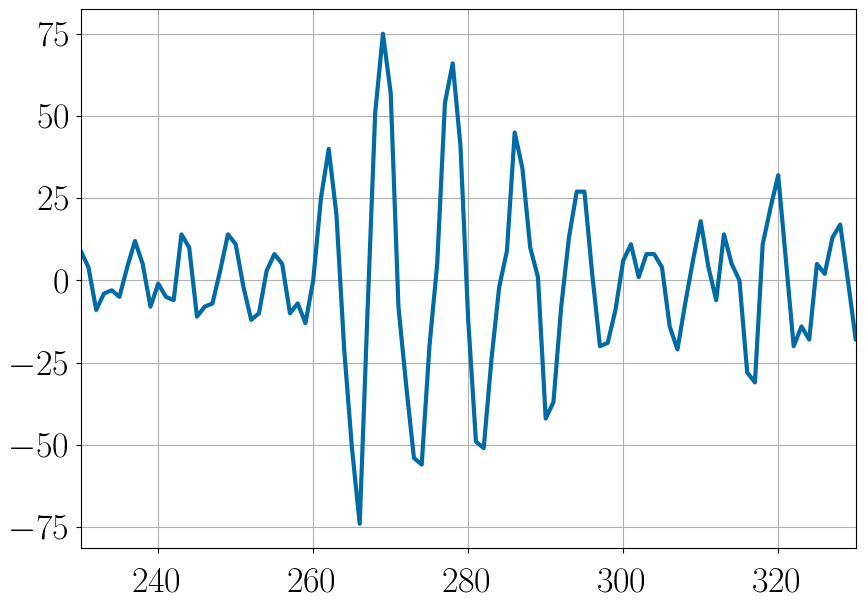

In [4]:
plt.plot(sig_traces[400,0])
plt.xlim([230,330])

In [5]:
trace = sig_traces[400,0]

dict_trigger_info = extract_trigger_parameters(trace, dict_trigger_parameter, baseline=0)    

In [6]:
dict_trigger_info

{'index_T1_crossing': 262,
 'index_T2_crossing': array([262, 268, 277, 286, 294]),
 'NC': 5,
 'Q': 15.0}

In [7]:
def FLT_0(trace,
          trigger_config,
          channels=[0,1]):

    '''
    Performs the offline FLT-0 trigger (=L1 trigger) that is on the GP300 firmware (v1b).

    Arguments
    ---------
    `trace`
    type        : np.ndarray[float]
    units       : ADC counts
    description : ADC trace, with shape (3,N_samples).

    `trigger_config`
    type        : dict
    description : Configuration parameters for the FLT-0.

    `channels`
    type        : list[int] or np.ndarray[int]
    description : Channels on which to apply the trigger algorithm.
    
                                
    Returns
    -------
    `flt0_results`
    type        : dict
    description : Results of the FLT0 trigger. Includes the channels on which a trigger was found and the trigger time (-1 means no trigger).
    '''

    trigger_flags_ch = np.zeros(3,dtype=bool)
    trigger_times_ch = -1*np.ones(3,dtype=int)

    for channel in channels:
        # Compute the relevant parameters for the trigger
        dict_trigger_info = extract_trigger_parameters(trace[channel], trigger_config, baseline=0)
        
        # Check if the trigger conditions are satisfied regarding the number of T2 crossings
        if dict_trigger_info['NC'] < trigger_config['nc_min'] or dict_trigger_info['NC'] > trigger_config['nc_max']:
            continue

        # Check if the trigger conditions are satisfied regarding the charge (typically not used)
        if dict_trigger_info['Q'] < trigger_config['q_min'] or dict_trigger_info['Q'] > trigger_config['q_max']:
            continue

        # Trigger time in a channel is defined as the moment when all trigger conditions are satisfied
        trigger_times_ch[channel]  = dict_trigger_info['index_T1_crossing'] + trigger_config['t_period']//2

    # Determine the trigger time of the FLT-0
    # Defined as the moment when all trigger conditions are satisfied + coincidence time window
    first_ch_trigger_time = np.min(trigger_times_ch[trigger_times_ch>=0])
    trigger_time          = first_ch_trigger_time + trigger_config['t_overlap']//2

    # Check if we get coincident triggers in the different channels in the coincidence time window
    for i, trigger_time_ch in enumerate(trigger_times_ch):
        if trigger_time_ch >= first_ch_trigger_time and trigger_time_ch <= trigger_time:
            trigger_flags_ch[i] = True

    # Save the flt0 results in a dictionary
    flt0_results = {'trigger_flags_ch':trigger_flags_ch,
                    'trigger_time':trigger_time}
    
    return flt0_results

In [8]:
FLT_0(sig_traces[400],dict_trigger_parameter)

{'trigger_flags_ch': array([ True,  True, False]), 'trigger_time': 550}